In [1]:
import pandas as pd
df = pd.read_csv("processed_support_tickets.csv")

In [2]:

df = pd.read_csv("processed_support_tickets.csv")
original_shape = df.shape
original_shape

(8469, 17)

In [3]:
#MODULE-3 — PART 1: Basic Data Profiling
# Basic summary
df.info()

# Numeric summary
df.describe()

# Missing values

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ticket ID                8469 non-null   int64  
 1   Customer Age             8469 non-null   int64  
 2   Customer Gender          8469 non-null   object 
 3   Product Purchased        8469 non-null   object 
 4   Date of Purchase         8469 non-null   object 
 5   Ticket Type              8469 non-null   object 
 6   Ticket Subject           8469 non-null   object 
 7   Ticket Description       8469 non-null   object 
 8   Ticket Status            8469 non-null   object 
 9   Ticket Priority          8469 non-null   object 
 10  First Response Time      5650 non-null   object 
 11  Time to Resolution       2769 non-null   object 
 12  Priority Score           8469 non-null   int64  
 13  Resolution Time (Hours)  2769 non-null   float64
 14  Unresolved              

Ticket ID                     0
Customer Age                  0
Customer Gender               0
Product Purchased             0
Date of Purchase              0
Ticket Type                   0
Ticket Subject                0
Ticket Description            0
Ticket Status                 0
Ticket Priority               0
First Response Time        2819
Time to Resolution         5700
Priority Score                0
Resolution Time (Hours)    5700
Unresolved                    0
Unresponded                   0
Resolution Category        7067
dtype: int64

In [4]:
#MODULE-3 — PART 2: Workload Analysis (Ticket Distribution)

In [5]:
import matplotlib.pyplot as plt

In [6]:
(df['Ticket Type'].value_counts(normalize=True) * 100).round(2)

Ticket Type
Refund request          20.69
Technical issue         20.63
Cancellation request    20.01
Product inquiry         19.38
Billing inquiry         19.29
Name: proportion, dtype: float64

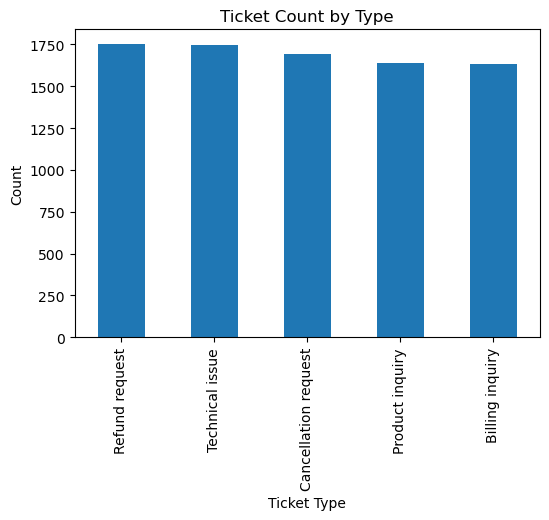

In [7]:

df['Ticket Type'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Ticket Count by Type')
plt.xlabel('Ticket Type')
plt.ylabel('Count')
plt.show()

In [8]:
(df['Ticket Priority'].value_counts(normalize=True) * 100).round(2)

Ticket Priority
Medium      25.88
Critical    25.14
High        24.62
Low         24.36
Name: proportion, dtype: float64

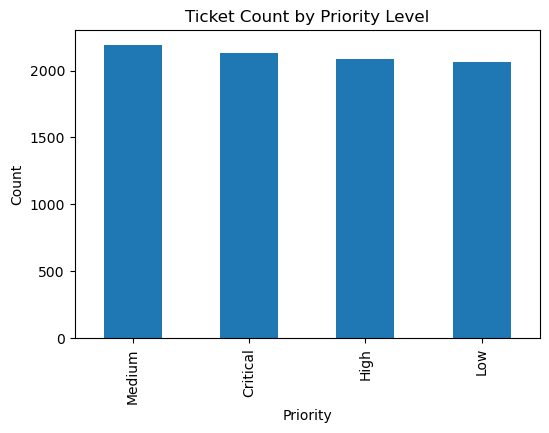

In [9]:
df['Ticket Priority'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Ticket Count by Priority Level')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

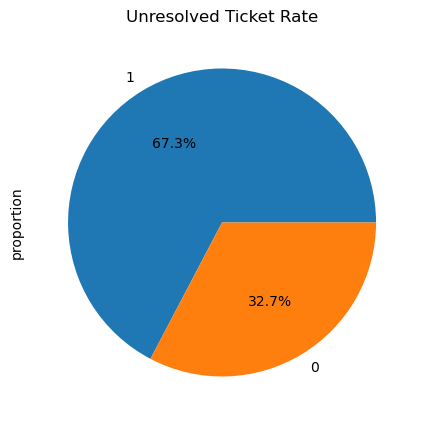

In [10]:
df['Unresolved'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title('Unresolved Ticket Rate')
plt.show()

In [11]:
#filling the uresolved with slow

In [12]:
df['Resolution Category'] = pd.cut(
    df['Resolution Time (Hours)'],
    bins=[0, 24, 72, float('inf')],
    labels=['Fast', 'Medium', 'Slow']
)

In [13]:
df['Resolution Category'] = df['Resolution Category'].fillna('Slow')

In [14]:
df.loc[df['Unresolved']==1, 'Resolution Category'] = 'Slow'

In [15]:
# MODULE-3 — PART 3: percentage calculation

In [16]:
df[df['Ticket Priority']=='Critical']['Resolution Time (Hours)'].mean()

11.435674931129478

In [17]:
df[df['Ticket Type']=='Technical issue']['Resolution Time (Hours)'].mean()

11.445775862068967

In [18]:
# MODULE-3 — PART 3: Performance Analysis

In [19]:
df['Resolution Time (Hours)'].describe()

count    2769.000000
mean       11.773282
std         7.042174
min         0.000000
25%         5.333333
50%        11.616667
75%        17.950000
max        23.983333
Name: Resolution Time (Hours), dtype: float64

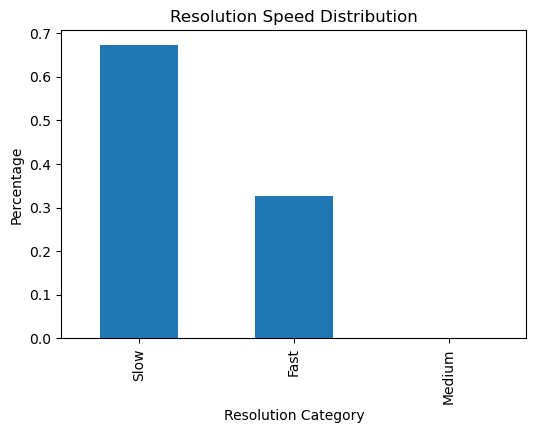

In [20]:
df['Resolution Category'].value_counts(normalize=True).plot(kind='bar', figsize=(6,4))
plt.title('Resolution Speed Distribution')
plt.ylabel('Percentage')
plt.show()

In [21]:
import seaborn as sns

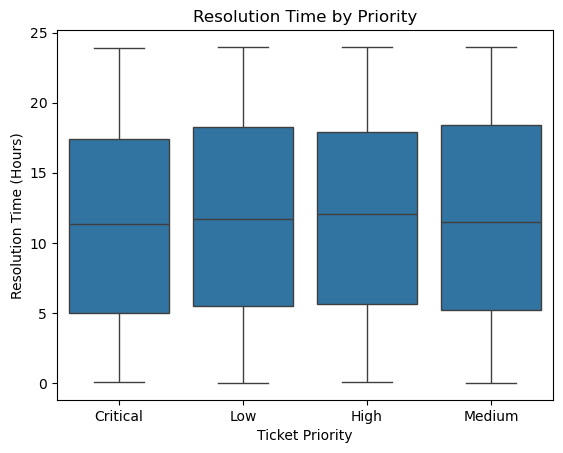

In [22]:
sns.boxplot(data=df, x='Ticket Priority', y='Resolution Time (Hours)')
plt.title('Resolution Time by Priority')
plt.show()

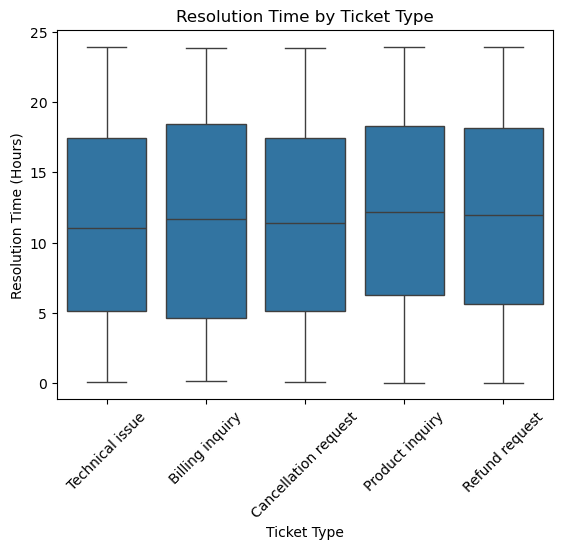

In [23]:
sns.boxplot(data=df, x='Ticket Type', y='Resolution Time (Hours)')
plt.title('Resolution Time by Ticket Type')
plt.xticks(rotation=45)
plt.show()

In [24]:
df.groupby('Ticket Status')['Resolution Time (Hours)'].mean().sort_values()

Ticket Status
Closed                       11.773282
Open                               NaN
Pending Customer Response          NaN
Name: Resolution Time (Hours), dtype: float64

In [25]:
#MODULE-3 — PART 4: Segmentation

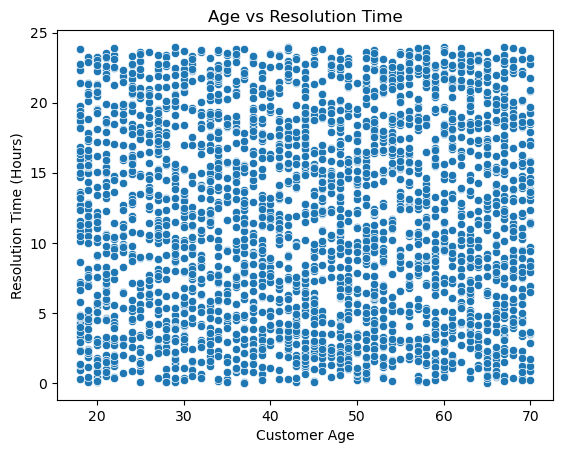

In [26]:
#Optional research
sns.scatterplot(data=df, x='Customer Age', y='Resolution Time (Hours)')
plt.title('Age vs Resolution Time')
plt.show()

In [27]:
df.groupby('Customer Gender')['Resolution Time (Hours)'].mean()

Customer Gender
Female    11.901846
Male      11.546870
Other     11.866360
Name: Resolution Time (Hours), dtype: float64

In [28]:
df.to_csv("processed2_support_tickets.csv", index=False)

In [29]:
#Module 4 Week 4 task
#Identify Key Problems -> Convert Problems → Causes -> Recommendations -> Expected Impact

In [30]:
#PART-1 — Root Cause Quantification

In [31]:
df.groupby('Ticket Type')['Unresolved'].mean().sort_values(ascending=False) #ticket type is contributing most to backlog

Ticket Type
Cancellation request    0.695575
Product inquiry         0.675198
Technical issue         0.668002
Billing inquiry         0.667075
Refund request          0.659817
Name: Unresolved, dtype: float64

In [32]:
df.groupby('Ticket Priority')['Unresolved'].mean().sort_values(ascending=False)

Ticket Priority
Low         0.687833
Medium      0.683394
High        0.661871
Critical    0.658995
Name: Unresolved, dtype: float64

In [33]:
df.groupby('Ticket Priority')['Resolution Time (Hours)'].mean().sort_values()

Ticket Priority
Critical    11.435675
High        11.846076
Medium      11.899640
Low         11.938018
Name: Resolution Time (Hours), dtype: float64

In [34]:
df.groupby('Ticket Type')['Resolution Time (Hours)'].mean().sort_values()

Ticket Type
Technical issue         11.445776
Cancellation request    11.508495
Billing inquiry         11.748070
Refund request          11.976426
Product inquiry         12.184584
Name: Resolution Time (Hours), dtype: float64

In [35]:
df['Ticket Status'].value_counts(normalize=True) * 100

Ticket Status
Pending Customer Response    34.018184
Open                         33.286102
Closed                       32.695714
Name: proportion, dtype: float64

In [36]:
#PART-2 — KPI Evaluation

In [37]:
#Service Level Agreement

df['SLA_Violation'] = (df['Resolution Time (Hours)'] > 12).astype(int)
df['SLA_Violation'].mean() * 100

15.928681072145473

In [38]:
df['Unresponded'].mean() * 100

33.28610225528398

In [39]:
#Efficiency = Resolved / Total Tickets

In [40]:
eff = (1 - df['Unresolved']).mean() * 100
eff

32.69571377966702

In [41]:
#PART-3 — Optimization Trigger Logic

In [42]:
df.groupby('Ticket Priority')['Unresolved'].mean()
df.groupby('Ticket Type')['Unresolved'].mean()

Ticket Type
Billing inquiry         0.667075
Cancellation request    0.695575
Product inquiry         0.675198
Refund request          0.659817
Technical issue         0.668002
Name: Unresolved, dtype: float64

In [43]:
#highest unresolved = top optimization target

In [44]:
#Priority-Based SLA Validation Code

In [45]:
sla_map = {'Critical': 12, 'High': 24, 'Medium': 48, 'Low': 72}
df['SLA'] = df['Ticket Priority'].map(sla_map)
df['SLA_Violation'] = (df['Resolution Time (Hours)'] > df['SLA']).astype(int)

df['SLA_Violation'].mean() * 100

4.120911559806353

In [46]:
#Clustering and similarities

In [47]:
#Step 2 — TF-IDF Vectorization
df['Text'] = df['Ticket Subject'].fillna('') + ' ' + df['Ticket Description'].fillna('')

In [48]:
#Step 2 — TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['Text'])


In [49]:
#Step 3 — KMeans Clustering
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [113]:
#Step 4 — Cluster Size Analysis

#This identifies workload concentration.
cluster_sizes = df['Cluster'].value_counts()
cluster_sizes


Cluster
4    3859
1    2094
0    1315
3     703
2     498
Name: count, dtype: int64

<Axes: title={'center': 'Cluster Size Distribution'}, xlabel='Cluster'>

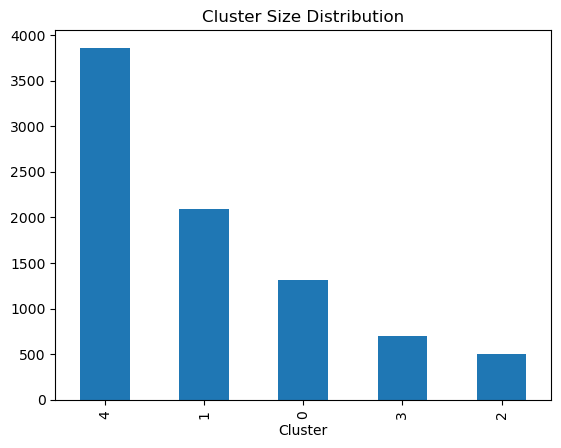

In [115]:
cluster_sizes.plot(kind='bar', title='Cluster Size Distribution')

In [119]:

dominant_priority = df.groupby('Cluster')['Ticket Priority'].agg(lambda x: x.value_counts().idxmax())
dominant_priority


Cluster
0        High
1      Medium
2      Medium
3      Medium
4    Critical
Name: Ticket Priority, dtype: object

In [ ]:
📌 Interpretation:
✔ >0.7 = very similar (strong recurring problem)
✔ 0.5–0.7 = moderate similarity
✔ <0.5 = weak cluster

In [107]:
#Step 6 — Map Cluster to Issue Type
dominant_issue = df.groupby('Cluster')['Ticket Type'].agg(lambda x: x.value_counts().index[0])
dominant_issue

Cluster
0          Refund request
1         Technical issue
2         Billing inquiry
3    Cancellation request
4          Refund request
Name: Ticket Type, dtype: object

In [121]:
summary = pd.DataFrame({
    'Cluster Size': cluster_sizes,
    'Dominant Issue Type': dominant_issue,
    'Dominant Priority': dominant_priority
})
summary


,Cluster Size,Dominant Issue Type,Dominant Priority
Cluster,,,
0,1315,Refund request,High
1,2094,Technical issue,Medium
2,498,Billing inquiry,Medium
3,703,Cancellation request,Medium
4,3859,Refund request,Critical
